In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('C:/Users/E R K PRADEEP/Downloads/kidney_disease.csv')
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,0,1,2,3,4,5,6,7,8,9
age,48.0,7.0,62.0,48.0,51.0,60.0,68.0,24.0,52.0,53.0
bp,80.0,50.0,80.0,70.0,80.0,90.0,70.0,NaN,100.0,90.0
sg,1.02,1.02,1.01,1.005,1.01,1.015,1.01,1.015,1.015,1.02
al,1.0,4.0,2.0,4.0,2.0,3.0,0.0,2.0,3.0,2.0
su,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
rbc,NaN,NaN,normal,normal,normal,NaN,NaN,normal,normal,abnormal
pc,normal,normal,normal,abnormal,normal,NaN,normal,abnormal,abnormal,abnormal
pcc,notpresent,notpresent,notpresent,present,notpresent,notpresent,notpresent,notpresent,present,present
ba,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [7]:
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [8]:
data=data.drop(columns=['id'],axis=1)

In [9]:
# cat to num:
columnsname=data.columns
# len(columnsname)
for i in range (0,25):
    print(columnsname[i],data[columnsname[i]].unique())

age [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
bp [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
sg [1.02  1.01  1.005 1.015   nan 1.025]
al [ 1.  4.  2.  3.  0. nan  5.]
su [ 0.  3.  4.  1. nan  2.  5.]
rbc [nan 'normal' 'abnormal']
pc ['normal' 'abnormal' nan]
pcc ['notpresent' 'present' nan]
ba ['notpresent' 'present' nan]
bgr [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153.  88. 226. 143. 1

In [10]:
data=data.replace({'\t':np.nan , '\t43':43,'\t6200':6200 , '\t8400':8400, '\t?':np.nan,'ckd\t':"ckd","\tyes":"yes","\tno":"no"," yes":"yes"})


In [11]:
data=data.replace({'yes':1 , 'no':0,'present':1 , 'notpresent':0, 'normal':1,'abnormal':0,"good":1,"poor":0})
data=pd.get_dummies(data,columns=['classification'],drop_first=True)

In [12]:
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification_notckd
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,0
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,47,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0,1
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,54,7800,6.2,0.0,0.0,0.0,1.0,0.0,0.0,1
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,49,6600,5.4,0.0,0.0,0.0,1.0,0.0,0.0,1
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,51,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,1


In [13]:
# Deal with missing value:
imputer=IterativeImputer(estimator=RandomForestRegressor(n_estimators= 100))
data=imputer.fit_transform(data)
data=pd.DataFrame(data,columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'])

C:\Users\E R K PRADEEP\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [14]:
cname=['rbc','pc','pcc','ba','appet','htn','dm','cad','pe','ane']
for i in range(0,10):
  for j in range(0,400):
    if data[cname[i]][j]>=0.5:
      data[cname[i]][j]=1.0
    else:
      data[cname[i]][j]=0.0

In [15]:
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0.0,1.0,0.0,0.0,121.00,...,44.0,7800.0,5.200,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,0.0,1.0,0.0,0.0,164.31,...,38.0,6000.0,4.413,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.00,...,31.0,7500.0,3.772,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.00,...,32.0,6700.0,3.900,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.00,...,35.0,7300.0,4.600,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.00,...,47.0,6700.0,4.900,0.0,0.0,0.0,1.0,0.0,0.0,1.0
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.00,...,54.0,7800.0,6.200,0.0,0.0,0.0,1.0,0.0,0.0,1.0
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.00,...,49.0,6600.0,5.400,0.0,0.0,0.0,1.0,0.0,0.0,1.0
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.00,...,51.0,7200.0,5.900,0.0,0.0,0.0,1.0,0.0,0.0,1.0


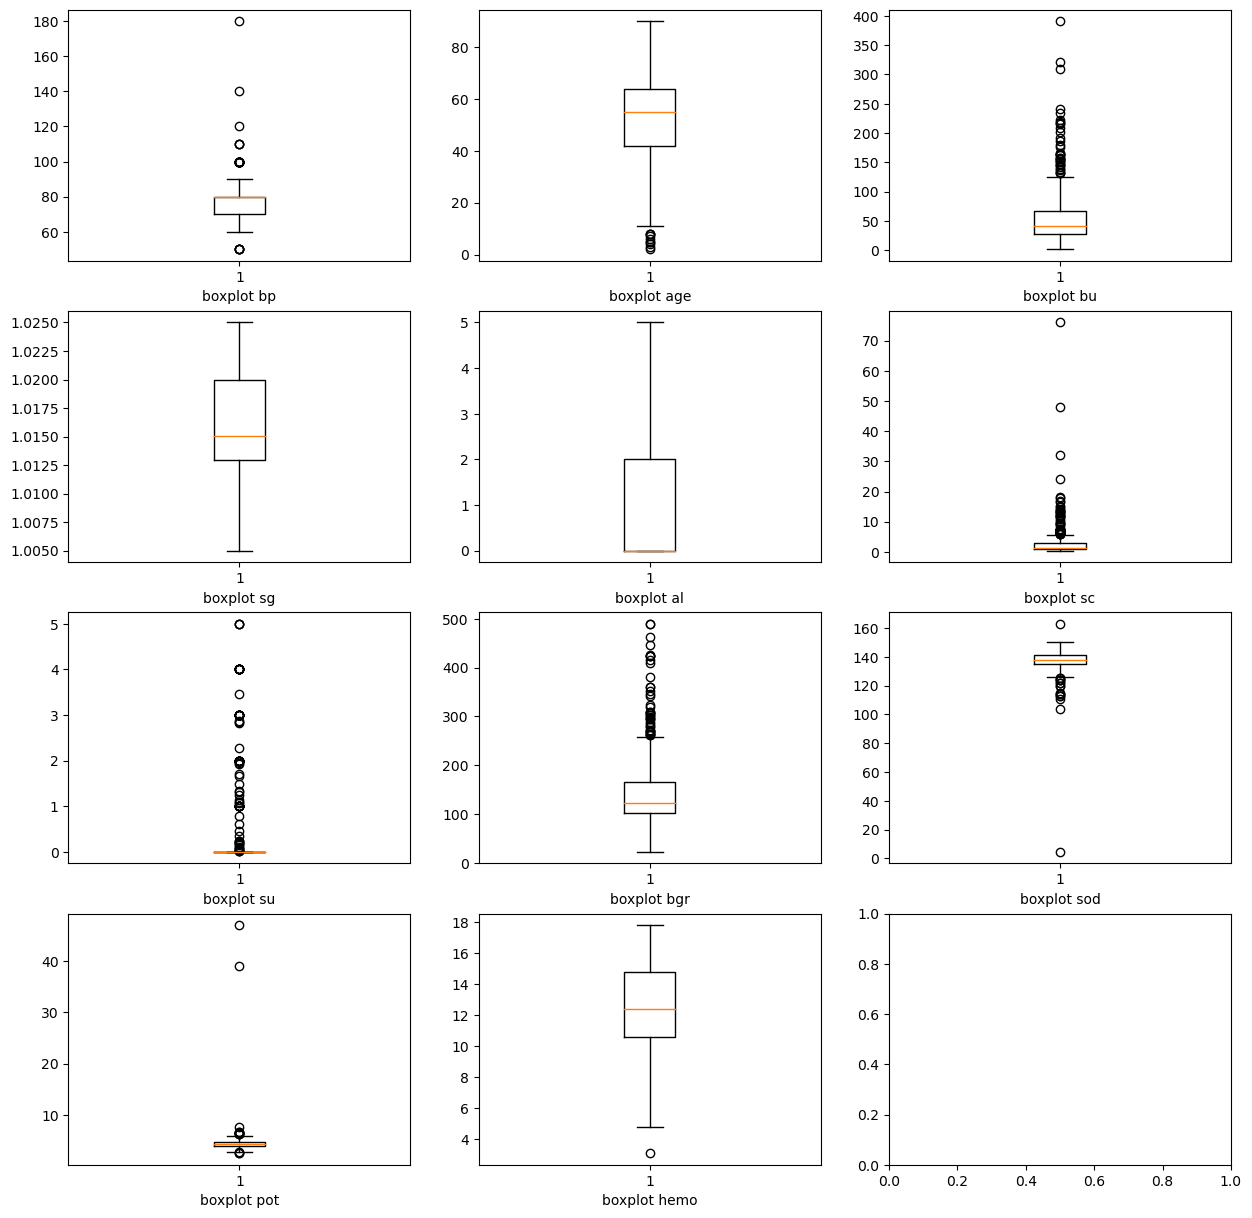

In [16]:
igure, axe = plt.subplots(4,3,figsize=(15,15))
axe[0,0].boxplot(data['bp'])
axe[0,0].set_xlabel("boxplot bp")
axe[0,1].boxplot(data['age'])
axe[0,1].set_xlabel("boxplot age")
axe[0,2].boxplot(data['bu'])
axe[0,2].set_xlabel("boxplot bu")

axe[1,0].boxplot(data["sg"])
axe[1,0].set_xlabel("boxplot sg")
axe[1,1].boxplot(data["al"])
axe[1,1].set_xlabel("boxplot al")
axe[1,2].boxplot(data["sc"])
axe[1,2].set_xlabel("boxplot sc")

axe[2,0].boxplot(data["su"])
axe[2,0].set_xlabel("boxplot su")
axe[2,1].boxplot(data["bgr"])
axe[2,1].set_xlabel("boxplot bgr")
axe[2,2].boxplot(data["sod"])
axe[2,2].set_xlabel("boxplot sod")

axe[3,0].boxplot(data["pot"])
axe[3,0].set_xlabel("boxplot pot")
axe[3,1].boxplot(data["hemo"])
axe[3,1].set_xlabel("boxplot hemo")

plt.show()

In [17]:
data.drop([21,61,128] ,axis=0, inplace=True)
data["pot"].sort_values()

3      2.5
172    2.5
191    2.7
173    2.8
243    2.9
      ... 
14     6.4
249    6.5
193    6.5
60     6.6
84     7.6
Name: pot, Length: 397, dtype: float64

In [18]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [19]:
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0.0,1.0,0.0,0.0,121.00,...,44.0,7800.0,5.200,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,0.0,1.0,0.0,0.0,164.31,...,38.0,6000.0,4.413,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.00,...,31.0,7500.0,3.772,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.00,...,32.0,6700.0,3.900,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.00,...,35.0,7300.0,4.600,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.00,...,47.0,6700.0,4.900,0.0,0.0,0.0,1.0,0.0,0.0,1.0
393,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.00,...,54.0,7800.0,6.200,0.0,0.0,0.0,1.0,0.0,0.0,1.0
394,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.00,...,49.0,6600.0,5.400,0.0,0.0,0.0,1.0,0.0,0.0,1.0
395,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.00,...,51.0,7200.0,5.900,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Text(0.5, 0, 'histogram pe')

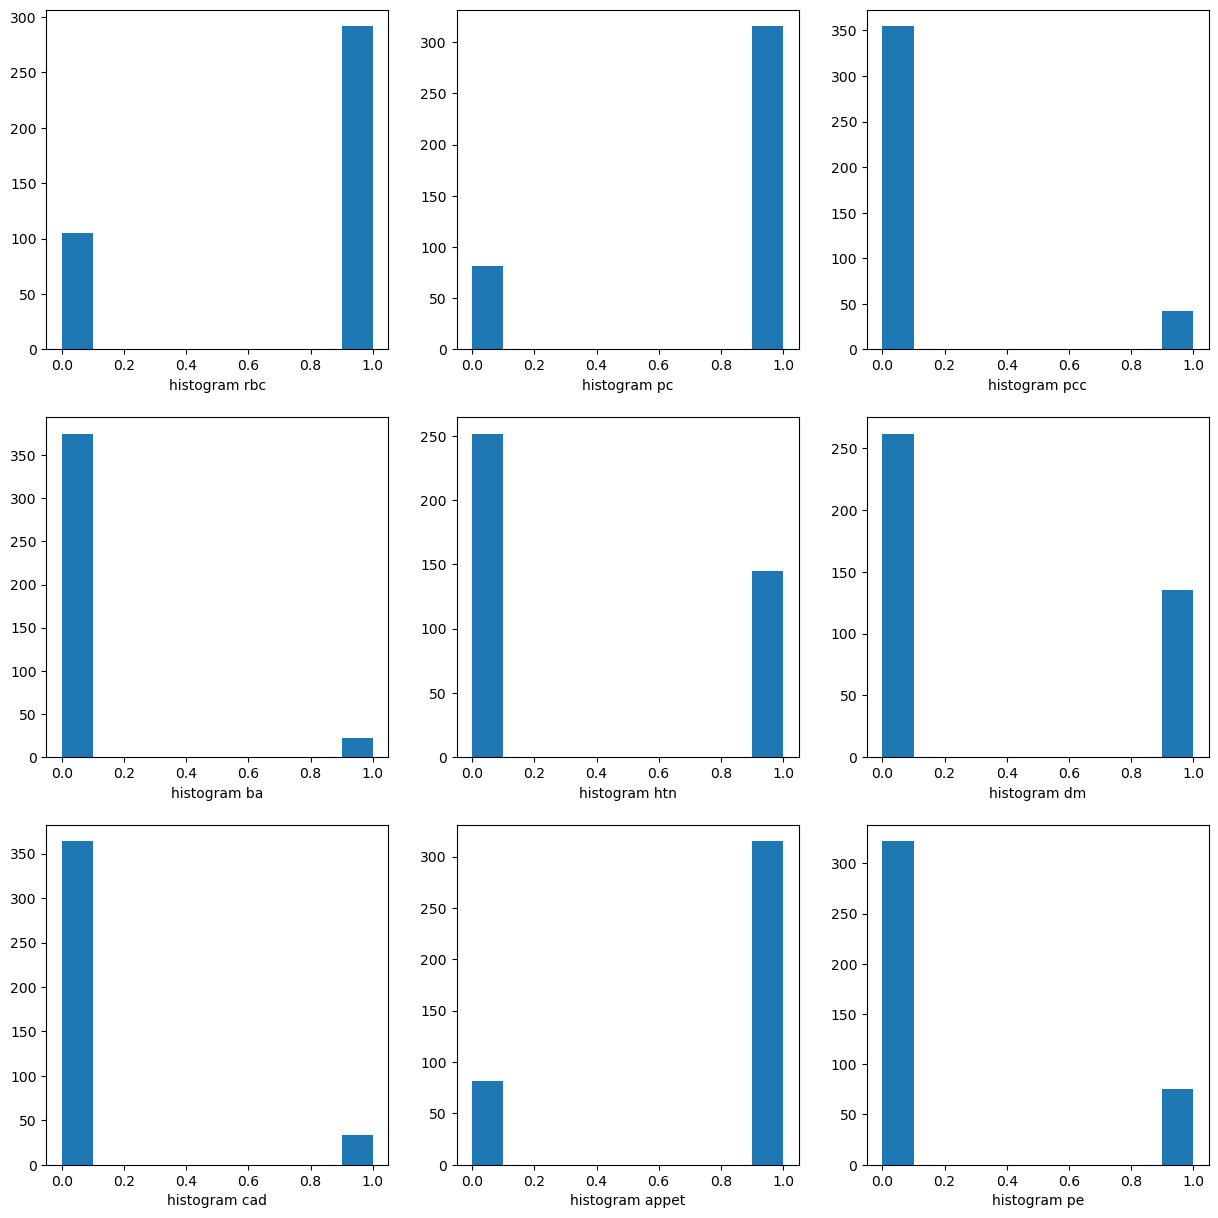

In [20]:
figure, axe = plt.subplots(3,3,figsize=(15, 15))
axe[0,0].hist(data['rbc'])
axe[0,0].set_xlabel("histogram rbc")
axe[0,1].hist(data['pc'])
axe[0,1].set_xlabel("histogram pc")
axe[0,2].hist(data['pcc'])
axe[0,2].set_xlabel("histogram pcc")

axe[1,0].hist(data["ba"])
axe[1,0].set_xlabel("histogram ba")
axe[1,1].hist(data["htn"])
axe[1,1].set_xlabel("histogram htn")
axe[1,2].hist(data["dm"])
axe[1,2].set_xlabel("histogram dm")


axe[2,0].hist(data["cad"])
axe[2,0].set_xlabel("histogram cad")
axe[2,1].hist(data["appet"])
axe[2,1].set_xlabel("histogram appet")
axe[2,2].hist(data["pe"])
axe[2,2].set_xlabel("histogram pe")

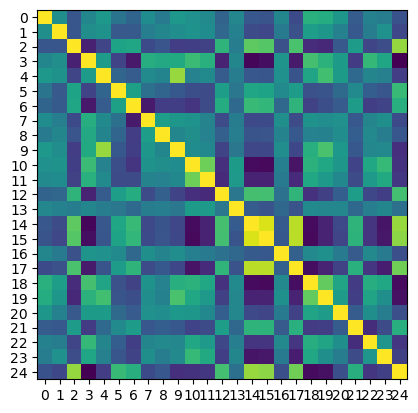

In [21]:
fig, ax = plt.subplots()
im = ax.imshow(data.corr())

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(data.columns)))
ax.set_yticks(np.arange(len(data.columns)))
plt.show()

In [22]:
#scaling
column=data.columns
for i in range(0,24):
  max=data[column[i]].max()
  min=data[column[i]].min()
  dif=max-min
  for j in range(0,397):
    data[column[i]][j]=(data[column[i]][j]-min)/dif

In [25]:
#splitting the dataset

x=data.drop(columns=['classification'],axis=1)
y=data['classification']

In [26]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

# training the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
knn.fit(x_train,y_train)

#test the model
pred=knn.predict(x_test)

pred
y_test

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#CALCULTAE THE ACCURACY
accuracy_score(y_test,pred)

#THE CLASSIFICATION REPORT
confusion_matrix(y_test,pred)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        54
         1.0       1.00      1.00      1.00        26

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [27]:
#Naive Bayes

#Initializing the Naive Bayes model
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

#Train the model
nb.fit(x_train,y_train)

#test the model
pred=nb.predict(x_test)
pred


# Evaluate the Model performance
from sklearn import metrics
metrics.confusion_matrix(y_test,pred)

print(metrics.classification_report(y_test,pred))

from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        54
         1.0       0.96      1.00      0.98        26

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



0.9875

In [28]:
#SVM

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier object
svm = SVC()

# Train the model
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        30

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [29]:
# Logistic Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        30

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy: 0.9875
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        50
         1.0       0.97      1.00      0.98        30

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

svm = SVC()
logreg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()

ensemble_model = VotingClassifier(estimators=[('svm', svm), ('logreg', logreg), ('decision_tree', decision_tree), ('knn', knn), ('naive_bayes', naive_bayes)], voting='hard')

ensemble_model.fit(X_train, y_train)

y_pred = ensemble_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)



Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        30

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [37]:
import pickle
ensemble_model = VotingClassifier(estimators=[('svm', svm), ('logreg', logreg), ('decision_tree', decision_tree), ('knn', knn), ('naive_bayes', naive_bayes)], voting='hard')

ensemble_model.fit(X_train, y_train)
# Save the model as a pickle file
with open('kd.pkl', 'wb') as file:
    pickle.dump(ensemble_model, file)